In [1]:
%matplotlib inline 
import matplotlib 
import matplotlib.pyplot as plt 
import numpy as np;
import matplotlib 
import seaborn as sns
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams.update({'font.size':22})


/Library/Python/2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/Library/Python/2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/Library/Python/2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/Library/Python/2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/Library/Python/2.7/site-packages/scipy/interpolate/_bsplines.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _bspl
/Libr

In [2]:
file_obj = open('081518_v.nat_IPTG titration assay_plasmids 7,8,9_WG.csv','r');
all_lines = file_obj.readlines();

In [3]:
OD_curves = all_lines[4:524]

GFP_curves = all_lines[1053:1574];

for ind in range(0,len(OD_curves)):
    OD_curves[ind] = (OD_curves[ind].strip("\r\n").split(',')[2:-1]);
    try:
        np.asarray(OD_curves[ind],dtype=np.float32);
    except:
        print OD_curves[ind]


for ind in range(0,len(GFP_curves)):
    GFP_curves[ind] = (GFP_curves[ind].strip("\r\n").split(',')[2:-1]);
GFP = np.asarray(GFP_curves,dtype=np.float32)

OD = np.asarray(OD_curves,dtype=np.float32)    

In [4]:
GFP_array  = np.zeros((8,12,GFP.shape[0]))
for col_ind in range(0,GFP.shape[1]):
    true_col = col_ind%12;
    true_row = col_ind/12;
    GFP_array[true_row][true_col][:] = GFP[:,col_ind];
    


In [5]:
OD_array  = np.zeros((8,12,OD.shape[0]))
for col_ind in range(0,OD.shape[1]):
    true_col = col_ind%12;
    true_row = col_ind/12;
    OD_array[true_row][true_col][:] = OD[:,col_ind];
    


In [6]:
NC = [6,7];
bg_curves = np.max(GFP_array[6:8][:][:],axis=0)
bg_max_curve = bg_curves[0]

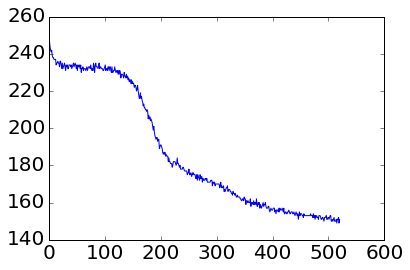

In [7]:
plt.plot(bg_max_curve)


In [8]:
colormap_rand = np.random.rand(12,3);

In [9]:
GFPnormOD = GFP_array - GFP_array;
for row in range(0,6):#:GFP_array.shape[0]):
    for col in range(0,GFP_array.shape[1]):
        this_curve =GFP_array[row][col][:]- bg_max_curve;
        GFP_array[row][col][:] = np.max(np.asarray([this_curve, [0.0]*len(this_curve)]) ,axis=0)
        #this_curve = GFP_array[row][col][:]
        for time_index in range(0,GFP_array.shape[2]-1):
            GFPnormOD[row][col][time_index]  = GFP_array[row][col][time_index]/OD_array[row][col][time_index];

(12, 521)
(12, 521)
(12, 521)
(12, 521)
(12, 521)
(12, 521)


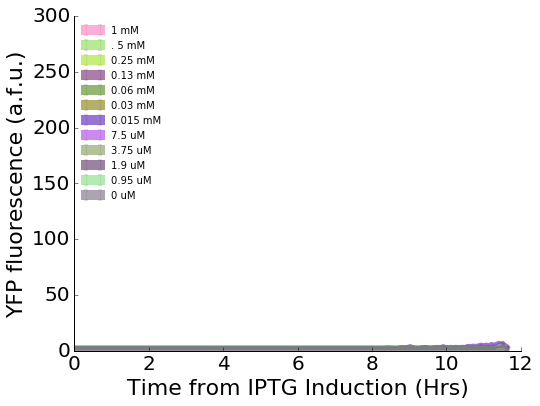

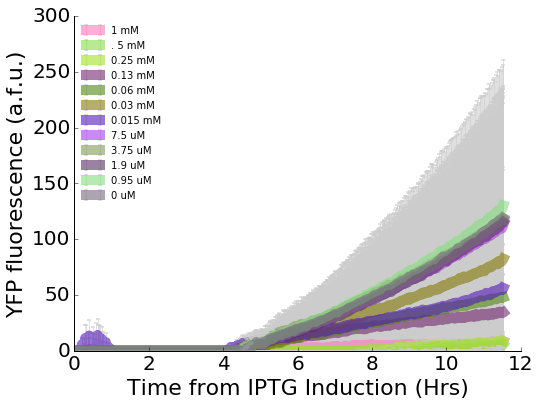

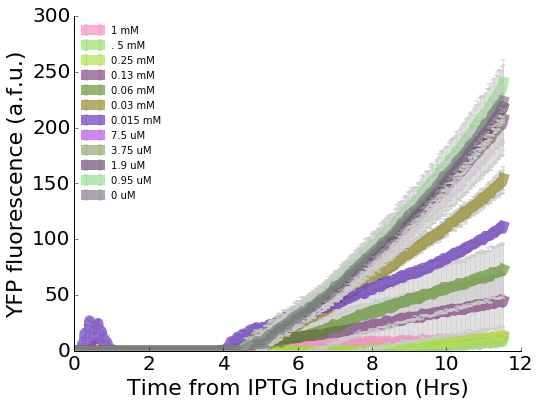

In [10]:
t_range = np.arange(0.0,GFPnormOD.shape[2]*80,80)/60.0/60.0
#print t_range.shape
for strain_series in range(0,3):
    plt.figure(strain_series,figsize=[8,6]);
    
    series_mean = np.mean(GFPnormOD[strain_series:strain_series+2][:][:],axis=0);#,'.')
    series_error = np.std(GFPnormOD[strain_series:strain_series+2][:][:],axis=0);
    print series_mean.shape
    print series_error.shape
    for col_ind in range(0,series_mean.shape[0]):
        h_plt = plt.errorbar(x=t_range[0:-1],y=series_mean[col_ind][0:-1],yerr=series_error[col_ind][0:-1],ecolor=[0.8,0.8,0.8],color = colormap_rand[col_ind][:],capsize=2,elinewidth=1,
    markeredgewidth=2,linewidth=10,alpha=0.6);
        h_ax= plt.gca();
        h_ax.spines['right'].set_visible(False)
        h_ax.spines['top'].set_visible(False)
        h_ax.yaxis.set_ticks_position('left')
        h_ax.xaxis.set_ticks_position('bottom')
        h_ax.set_ylim([0.0,300]);
    h_leg = h_ax.legend(['1 mM','. 5 mM','0.25 mM','0.13 mM', '0.06 mM','0.03 mM','0.015 mM','7.5 uM','3.75 uM','1.9 uM','0.95 uM','0 uM'],
                      loc='upper left',fontsize=10)
    h_leg.get_frame().set_linewidth(0.0);
#    plt.legend(frameon=False)
    
#    leg.get_frame().set_linewidth(0.0)
    plt.xlabel('Time from IPTG Induction (Hrs)')
    plt.ylabel('YFP fluorescence (a.f.u.)')
    
#GFP_array = np.max(GFP_array - bg_max_curve,0.0)

In [11]:
np.max(np.asarray([this_curve, [0.0]*len(this_curve)]) ,axis=0)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   